In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [50]:
from time import time

In [43]:
#from statsmodels.tsa.arima_model import ARIMA #Depreceated 
from statsmodels.tsa.arima.model import ARIMA

In [4]:
df_ice_cream = pd.read_csv('ice_cream.csv')

In [6]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [8]:
df_ice_cream.shape

(577, 2)

In [9]:
df_ice_cream.rename(columns={'DATE':'Date','IPN31152N':'Production'},inplace=True)

In [10]:
df_ice_cream.head()

,Date,Production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [11]:
df_ice_cream['Date']=pd.to_datetime(df_ice_cream.Date)

In [12]:
df_ice_cream.head()

,Date,Production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [13]:
df_ice_cream.set_index('Date',inplace=True)

In [14]:
df_ice_cream.head()

,Production
Date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [15]:
start_date=pd.to_datetime('2010-01-01')
df_ice_cream=df_ice_cream[start_date:]

In [16]:
df_ice_cream.head()

,Production
Date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


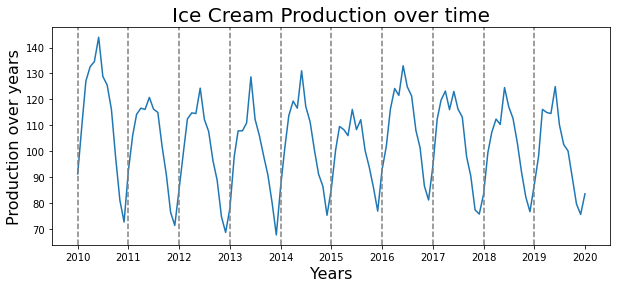

In [27]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.Production)
plt.title('Ice Cream Production over time',fontsize=20)
plt.ylabel('Production over years',fontsize=16)
plt.xlabel('Years',fontsize=16)
for year in range(2010,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),linestyle='--',color='grey')

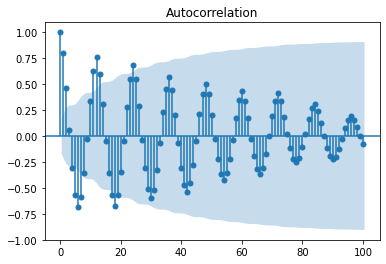

In [29]:
acf_plot=plot_acf(df_ice_cream.Production,lags=100)

## Since the plot is decaying over time, it is an autoregressive model. If the plot would have shut off after some lags, it would have suited a moving average model.
## The blue shaded lags are insignificant

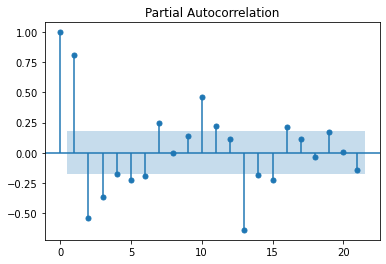

In [34]:
pacf_plot=plot_pacf(df_ice_cream.Production)

In [47]:
train_end = datetime(2018,12,1)

test_end = datetime(2019,12,1)
train = df_ice_cream[:train_end]

from datetime import timedelta
test = df_ice_cream[train_end+timedelta(days=1):test_end]

# Fitting the AR Model

In [45]:
df_ice_cream = df_ice_cream.asfreq(pd.infer_freq(df_ice_cream.index))#inferring the frequency as the index values

In [48]:
ar_model = ARIMA(train,order=(3,0,0))

In [55]:
start = time()
ar_model_fit=ar_model.fit()
end = time()
print('Model Fitting Time',end-start)

Model Fitting Time 0.137237548828125


In [57]:
#Summary of model
print(ar_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                  108
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -374.085
Date:                Sun, 12 Sep 2021   AIC                            758.170
Time:                        08:42:33   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5743      2.169     47.761      0.000      99.324     107.825
ar.L1          1.0469      0.102     10.256      0.000       0.847       1.247
ar.L2         -0.0523      0.175     -0.298      0.7

In [125]:
print(df_ice_cream.index[0])

print(train.index[0])

print(type(predictions))

2010-01-01 00:00:00
2010-01-01 00:00:00
<class 'pandas.core.series.Series'>


In [126]:
pred_start_date=test.index[0]
pred_end_date=test.index[-1]


print(pred_start_date)
print(pred_end_date)

predictions = ar_model_fit.predict(start=pred_start_date, end=pred_end_date)
# residuals=test-predictions#Residuals from here not valid, since predictions is a series

2019-01-01 00:00:00
2019-12-01 00:00:00


In [131]:
type(predictions)

pandas.core.series.Series

In [136]:
test_s=test.iloc[:,0]

In [138]:
type(test_s)

pandas.core.series.Series

In [139]:
residuals=test_s-predictions

In [141]:
residuals.head()

Date
2019-01-01     5.762551
2019-02-01     7.971090
2019-03-01    14.648628
2019-04-01     3.806251
2019-05-01    -2.499282
Freq: MS, dtype: float64

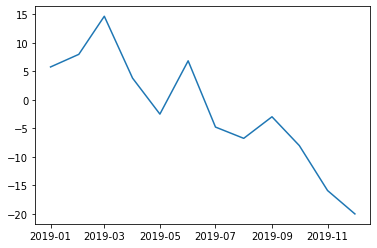

In [140]:
plt.plot(residuals)

In [142]:
print('Mean Absolute Error',round(np.mean(abs(residuals/test))),4)

Mean Absolute Error 2019-01-01 00:00:00   NaN
2019-02-01 00:00:00   NaN
2019-03-01 00:00:00   NaN
2019-04-01 00:00:00   NaN
2019-05-01 00:00:00   NaN
2019-06-01 00:00:00   NaN
2019-07-01 00:00:00   NaN
2019-08-01 00:00:00   NaN
2019-09-01 00:00:00   NaN
2019-10-01 00:00:00   NaN
2019-11-01 00:00:00   NaN
2019-12-01 00:00:00   NaN
Pr                    NaN
Predictions           NaN
Production            NaN
dtype: float64 4


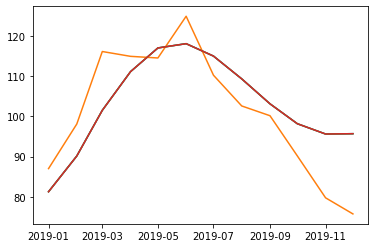

In [132]:
plt.plot(predictions)
plt.plot(test)


In [143]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


mean_abs_error=mae(test_s,predictions)

mean_abs_error

mean_sqr_error=mse(test_s,predictions)#Mean Square error

len(test_s)

residuals.sum()*1.0/len(test_s)#Bias. Net positive or negative error

np.sqrt(mean_sqr_error)#root mean square error

In [144]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2019-01-01 to 2019-12-01
Freq: MS
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Production   12 non-null     float64
 1   Predictions  12 non-null     float64
 2   Pr           12 non-null     float64
dtypes: float64(3)
memory usage: 684.0 bytes


In [93]:
predictions.head()

Date
2019-01-01     81.236249
2019-02-01     90.140510
2019-03-01    101.523172
2019-04-01    111.164049
2019-05-01    117.060582
Freq: MS, Name: predicted_mean, dtype: float64

In [92]:
predictions.index=test.index

In [94]:
pred_df=predictions.to_frame()

In [95]:
pred_df.head()

,predicted_mean
Date,
2019-01-01,81.236249
2019-02-01,90.140510
2019-03-01,101.523172
2019-04-01,111.164049
2019-05-01,117.060582


In [97]:
pred_df.shape

(12, 1)

In [98]:
test.shape

(12, 1)

In [112]:
test.head()

,Production,Predictions,Pr
Date,,,
2019-01-01,86.9988,81.236249,81.236249
2019-02-01,98.1116,90.140510,90.140510
2019-03-01,116.1718,101.523172,101.523172
2019-04-01,114.9703,111.164049,111.164049
2019-05-01,114.5613,117.060582,117.060582


In [103]:
result=test

In [106]:
result.join(pred_df["predicted_mean"])

,Production,Predictions,predicted_mean
Date,,,
2019-01-01,86.9988,81.236249,81.236249
2019-02-01,98.1116,90.140510,90.140510
2019-03-01,116.1718,101.523172,101.523172
2019-04-01,114.9703,111.164049,111.164049
2019-05-01,114.5613,117.060582,117.060582
2019-06-01,124.9605,118.125846,118.125846
2019-07-01,110.2632,115.033483,115.033483
2019-08-01,102.6085,109.355515,109.355515
2019-09-01,100.1741,103.142077,103.142077


In [107]:
result["Pr"]=pred_df.values

<ipython-input-107-1cb69d63052c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Pr"]=pred_df.values


In [118]:
residuals=pd.DataFrame(index=test.index,data=(test['Production']-test['Predictions']),columns=['Residuals'])

In [119]:
residuals

,Residuals
Date,
2019-01-01,5.762551
2019-02-01,7.971090
2019-03-01,14.648628
2019-04-01,3.806251
2019-05-01,-2.499282
2019-06-01,6.834654
2019-07-01,-4.770283
2019-08-01,-6.747015
2019-09-01,-2.967977


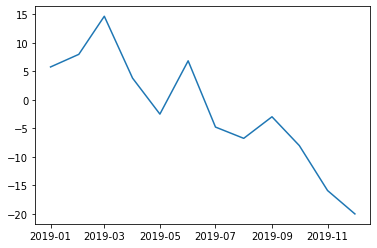

In [120]:
plt.plot(residuals)

In [85]:
pred_series=pd.Series(predictions,index=test.index)

In [88]:
pred_series.head()

Date
2019-01-01     81.236249
2019-02-01     90.140510
2019-03-01    101.523172
2019-04-01    111.164049
2019-05-01    117.060582
Freq: MS, Name: predicted_mean, dtype: float64

In [82]:
ar_model_fit.resid

Date
2010-01-01   -12.284757
2010-02-01    16.924758
2010-03-01     7.692699
2010-04-01    -0.160136
2010-05-01     4.578081
                ...    
2018-08-01    -1.342667
2018-09-01    -0.582123
2018-10-01    -5.171672
2018-11-01    -5.492402
2018-12-01    -5.386762
Freq: MS, Length: 108, dtype: float64

In [81]:
pred_df=pd.Dataframe(predictions)

AttributeError: module 'pandas' has no attribute 'Dataframe'

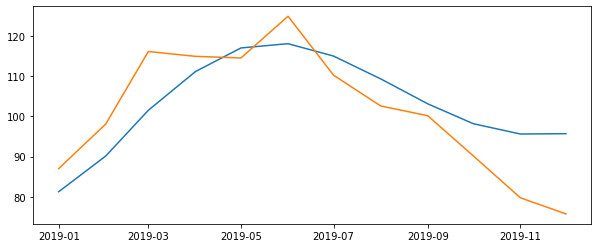

In [75]:
plt.figure(figsize=(10,4))
plt.plot(predictions)
plt.plot(test)

In [ ]:
#Mean absolute error
